In [16]:
library(remotes)
library(dplyr)
library(HandyCNV)
library(tidyr)
library(reshape2)
library(data.table)
library(tidyverse)

In [17]:
setwd(dir ="/branchinecta/jbazanwilliamson/OVERLAPED_CNVNATOR/") #remember to replace the path with your own 

>>CNVnator sample

In [18]:
cnvnator.file <- read.csv("/branchinecta/jbazanwilliamson/scripts/cnvator_data_paper_overlapped.csv")
#names(cnvnator.file) <- c('X','CHR', 'START','END','SMPL','state')

cnvnator.file

#: 2039592 × 5

Sample_ID,Chr,Start,End,SIZE,SCORE,RD,LENGHT,CHR_2,START_2,END_2
<chr>,<int>,<int>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>
LP6005441-DNA_A01,1,13052901,13132400,1,deletion,9.62942e-02,79500,1,13106780,13123007
LP6005441-DNA_A01,1,13052901,13132400,1,deletion,9.62942e-02,79500,1,13121719,13124296
LP6005441-DNA_A01,1,13052901,13132400,1,deletion,9.62942e-02,79500,1,13103107,13124296
LP6005441-DNA_A01,1,13052901,13132400,1,deletion,9.62942e-02,79500,1,13103107,13106780
LP6005441-DNA_A01,1,35101401,35111900,1,deletion,4.76836e-01,10500,1,35097170,35112437
LP6005441-DNA_A01,1,72766401,72811800,1,deletion,4.75830e-01,45400,1,72767498,72812601
LP6005441-DNA_A01,1,106015801,106023400,1,deletion,4.56961e-01,7600,1,106012173,106025243
LP6005441-DNA_A01,1,116229501,116232800,1,deletion,0.00000e+00,3300,1,116228153,116233562
LP6005441-DNA_A01,1,144224301,144300000,1,deletion,1.46466e-01,75700,1,144146792,144224420


In [19]:
cnvnator.file$Chr <- as.double(cnvnator.file$Chr)
cnvnator.file$Start <- as.double(cnvnator.file$Start)
cnvnator.file$End <- as.double(cnvnator.file$End)
cnvnator.file$RD<- as.double(cnvnator.file$RD)

#cnvnator.file

cnv = (data.frame(Sample_ID = c(cnvnator.file$Sample_ID),
                  Chr = c(cnvnator.file$Chr),
           Start = c(cnvnator.file$Start),
           End = c(cnvnator.file$End),
           CNV_Value = c(cnvnator.file$RD)))

cnv



Sample_ID,Chr,Start,End,CNV_Value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
LP6005441-DNA_A01,1,13052901,13132400,9.62942e-02
LP6005441-DNA_A01,1,13052901,13132400,9.62942e-02
LP6005441-DNA_A01,1,13052901,13132400,9.62942e-02
LP6005441-DNA_A01,1,13052901,13132400,9.62942e-02
LP6005441-DNA_A01,1,35101401,35111900,4.76836e-01
LP6005441-DNA_A01,1,72766401,72811800,4.75830e-01
LP6005441-DNA_A01,1,106015801,106023400,4.56961e-01
LP6005441-DNA_A01,1,116229501,116232800,0.00000e+00
LP6005441-DNA_A01,1,144224301,144300000,1.46466e-01


In [20]:
cnv_standard <- cnv_clean(standard_cnv = cnv, #when running your own data, set this argument by 'standard_cnv = "localpath/file"'
                 drop_length = 5, #the maximum CNV length threshold (in Mb); CNVs larger than this value will be deleted
                 folder = "cnv_clean")

Output folder 'cnv_clean' has been created in the working directory.
There are 276 individuals with 192085 CNVs in total.
The average number of CNV per individual is 695.96
Basic summary stats by CNV type:
# A tibble: 109,559 × 5
   CNV_Value     N `Average Length` `Min Length` `Max Length`
       <dbl> <int>            <dbl>        <dbl>        <dbl>
 1 0          1540             6629         2600       100100
 2 0.0000150     1           150100       150100       150100
 3 0.0000165     1           150100       150100       150100
 4 0.0000208     1           100100       100100       100100
 5 0.0000259     1           100100       100100       100100
 6 0.0000268     1           100100       100100       100100
 7 0.0000282     1           100100       100100       100100
 8 0.0000286     1           100100       100100       100100
 9 0.0000331     1           150100       150100       150100
10 0.0000355     1           150100       150100       150100
# … with 109,549 more rows

In [21]:
cnv_visual(clean_cnv = cnv_standard, #standard file was generated by 'cnv_clean' function in section 1
           max_chr = 22, #select how many chromosomes to plot 
           width_1 = 20, #optional,adjust the width of final plot
           height_1 =12, #optional,adjust the height of final plot
           folder = "cnv_visual")

A new folder 'cnv_visual' was created in working directory.
Input data passed requirment check...
[1] "Plotting the CNVs on Chromosome 1"
[1] "Plotting the CNVs on Chromosome 2"
[1] "Plotting the CNVs on Chromosome 3"
[1] "Plotting the CNVs on Chromosome 4"
[1] "Plotting the CNVs on Chromosome 5"
[1] "Plotting the CNVs on Chromosome 6"
[1] "Plotting the CNVs on Chromosome 7"
[1] "Plotting the CNVs on Chromosome 8"
[1] "Plotting the CNVs on Chromosome 9"
[1] "Plotting the CNVs on Chromosome 10"
[1] "Plotting the CNVs on Chromosome 11"
[1] "Plotting the CNVs on Chromosome 12"
[1] "Plotting the CNVs on Chromosome 13"
[1] "Plotting the CNVs on Chromosome 14"
[1] "Plotting the CNVs on Chromosome 15"
[1] "Plotting the CNVs on Chromosome 16"
[1] "Plotting the CNVs on Chromosome 17"
[1] "Plotting the CNVs on Chromosome 18"
[1] "Plotting the CNVs on Chromosome 19"
[1] "Plotting the CNVs on Chromosome 20"
[1] "Plotting the CNVs on Chromosome 21"
[1] "Plotting the CNVs on Chromosome 22"
Task done

In [22]:
cnv_summary_plot(clean_cnv = cnv_standard, #standard file was generated by 'cnv_clean' function in section 1
                 length_group = c(0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 1, 2, 5), # optional, set group of vectors to divide CNV length, unit is Mb. such as vector of ‘c(0.05, 0.3, 1)’, means divide the CNV length into four group: '<0.05Mb', '0.05 - 0.3Mb', '0.3-1Mb' and '>1Mb', maximum can accept 11 valueses
                 col_0 = "red", #optional, customize color for o copy CNV 
                 col_1 = "black", #optional, customize color for o copy CNV 
                 col_3 = "purple", #optional, customize color for o copy CNV 
                 col_4 = "blue", #optional, customize color for o copy CNV 
                 plot_sum_1 = TRUE,  #optional, make sum combination plot 1
                 height_sum1 = 26, #optional, adjust the size of sum plot 1
                 width_sum1 = 20, #optional, adjust the size of sum plot 1
                 plot_sum_2 = TRUE, #optional, make sum combination plot 2
                 height_sum2 = 20, #optional, adjust the size of sum plot 2
                 width_sum2 = 27, #optional, adjust the size of sum plot 2
                 folder = "cnv_summary_plot_cnvnator")

ERROR: Error in cnv_summary_plot(clean_cnv = cnv_standard, length_group = c(0.05, : Summary plot can only working on 0 to 4 copies now.



A new folder 'cnv_visual_LP6005442-DNA_B01' was created in working directory.
Input data passed requirment check...
Task done, plot was stored in working directory.


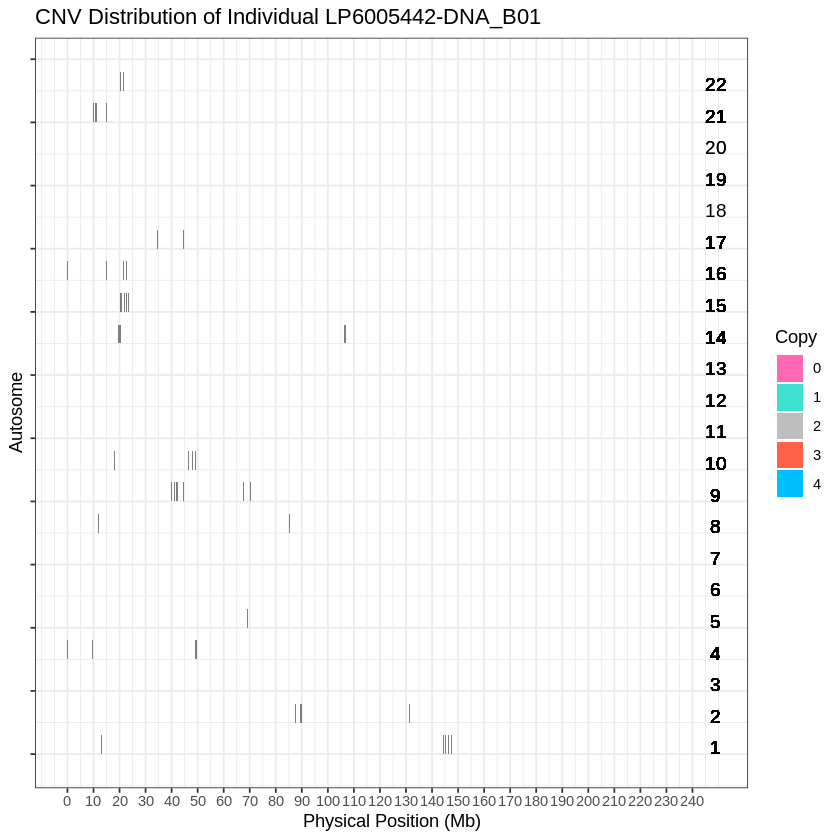

In [23]:
cnv_visual(clean_cnv = cnv_standard, #standard file was generated by 'cnv_clean' function in section 1
           individual_id = "LP6005442-DNA_B01", #set the sample ID  
           width_1 = 20, #optional, adjust the width of final plot
           height_1 = 13, #optional. adjust the height of final plot
           folder = "cnv_visual_LP6005442-DNA_B01")

In [24]:
cnvr_cnvnator <- call_cnvr(clean_cnv = cnv_standard, #standard file was generated by 'cnv_clean' function in section 1
                  chr_set = 25, #Set the maximum number of chromosomes (29 autosomes for cattle)
                  folder = "cnvr_cnvnator")


Chromosome 1 has been processed.
Chromosome 2 has been processed.
Chromosome 3 has been processed.
Chromosome 4 has been processed.
Chromosome 5 has been processed.
Chromosome 6 has been processed.
Chromosome 7 has been processed.
Chromosome 8 has been processed.
Chromosome 9 has been processed.
Chromosome 10 has been processed.
Chromosome 11 has been processed.
Chromosome 12 has been processed.
Chromosome 13 has been processed.
Chromosome 14 has been processed.
Chromosome 15 has been processed.
Chromosome 16 has been processed.
Chromosome 17 has been processed.
Chromosome 18 has been processed.
Chromosome 19 has been processed.
Chromosome 20 has been processed.
Chromosome 21 has been processed.
Chromosome 22 has been processed.
No CNVs detected on Chromosome23.
No CNVs detected on Chromosome24.
No CNVs detected on Chromosome25.
No 1-copy type detected in CNV list.
No 3-copy type detected in CNV list.
No 4-copy type detected in CNV list.
2327 CNVRs generated in total.
Overall summary o

In [ ]:
cnvr_cnvnator

In [ ]:
get_refgene()

In [25]:
Human_hg19 <- get_refgene(gene_version = "Human_hg19")

New folder 'refgene' was created in working directory.
Link to the website...
Converting format...
Task done.


In [26]:
call_gene(refgene = "refgene/Human_hg19.txt", #standard file was generated by 'get_refgene' function in section 5.1
          interval = cnvr_cnvnator, #optional, standard file was generated by 'call_cnvr' function in section 4
          clean_cnv = cnv_standard, #optional, standard file was generated by 'cnv_clean' function in section 1
          folder = "call_gene_CNVNator_Hg19")

Output folder 'call_gene_CNVNator_Hg19' has been created in the working directory.
Checking gene annotation status in the interval file...
Summary of annotation results:
  Interval_Has_Gene Interval_Without_Gene Total_Number_of_Genes
1              1448                   879                  5904
Checking gene annotation status in CNV file...
5904 genes were matched in the CNV and CNVR results. The 10 most frequent genes:
# A tibble: 10 × 2
# Groups:   name2 [10]
   name2        Frequency
   <chr>            <int>
 1 NBPF19            6517
 2 NBPF20            6517
 3 FAM30A            3530
 4 ADAM6             3526
 5 LOC101927079      3046
 6 NBPF10            2640
 7 LINC00226         2534
 8 LOC107987389      2251
 9 HERC2P3           2118
10 IGHV1OR15-3       2070


Warning message in call_gene(refgene = "refgene/Human_hg19.txt", interval = cnvr_cnvnator, :
“The following genes are duplicated in multiple CNVRs, and will only be annotated on the first CNVR_ID in the final gene frequency list report!
”


               name2        ID Chr  i.Start    i.End
  1:          CAMTA1   CNVR_10   1  5871901  6860800
  2:          CAMTA1   CNVR_11   1  7385501  7454700
  3:          CAMTA1   CNVR_12   1  7462901  7843400
  4:         TMEM50A   CNVR_33   1 25589401 25665200
  5:         TMEM50A   CNVR_34   1 25667101 25739200
 ---                                                
308:    LOC107987389 CNVR_2286  22 20744901 21762700
309: SPECC1L-ADORA2A CNVR_2290  22 23845201 24712800
310: SPECC1L-ADORA2A CNVR_2291  22 24776901 25411300
311:          LARGE1 CNVR_2300  22 33755501 33760200
312:          LARGE1 CNVR_2301  22 33780401 33783400


name2,Frequency,ID,Chr,CNVR_Start,CNVR_End
<chr>,<int>,<chr>,<int>,<dbl>,<dbl>
NBPF19,6517,CNVR_110,1,143871001,144506200
NBPF20,6517,CNVR_110,1,143871001,144506200
FAM30A,3530,CNVR_1822,14,106045501,107289500
ADAM6,3526,CNVR_1822,14,106045501,107289500
LOC101927079,3046,CNVR_1823,15,20198401,23679800
NBPF10,2640,CNVR_113,1,144832101,145439800
LINC00226,2534,CNVR_1822,14,106045501,107289500
LOC107987389,2251,CNVR_2285,22,19544101,20700000
HERC2P3,2118,CNVR_1823,15,20198401,23679800


In [27]:
cnvr_plot(cnvr = "cnvr_qdnaseq/cnvr.txt", #standard file was generated by 'call_cnvr' function in section 4
          assembly = "Homo Sapiens", #cattle could select 'UMD' or 'ARS', other species could assign the name of species
          loss_col = "green2", #optional, adjust the color of Loss type of CNVR
          gain_col = "red", #optional, adjust the color of Gain type of CNVR
          mixed_col = "black",  #optional, adjust the color of Mixed type of CNVR
          legend_x = 127, #optional, adjust the horizontal position of legend
          legend_y = 30,  #optional, adjust the vertical position of legend
          #height_1 = 14, #optional, adjust the height of CNVR plot
          #width_1 = 10, #optional, adjust the width of CNVR plot
          folder = "cnvr_plot_qdnaseq")

A new folder 'cnvr_plot_qdnaseq' was created in working directory.


ERROR: Error in fread(file = cnvr, header = TRUE, sep = "\t"): File 'cnvr_qdnaseq/cnvr.txt' does not exist or is non-readable. getwd()=='/branchinecta/jbazanwilliamson/OVERLAPED_CNVNATOR'


In [ ]:
cnvr_plot(cnvr = "cnvr_qdnaseq/cnvr.txt", #standard file was generated by 'call_cnvr' function in section 4
          clean_cnv = "cnv_clean/cleancnv.cnv", #standard file was generated by 'cnv_clean' function in section 1
          refgene = "refgene/Human_hg19.txt", #standard file was generated by 'get_refgene' function in section 5.1
          sample_size = 279, #total sample size
          common_cnv_threshold = 0.5, #the CNV frequency threshold
          width_1 = 10, #optional, adjust the width of final plot
          height_1 = 10, #optional, adjust the height of final plot
          col_gene = "blue", #optional, adjust the colour of annotated genes
          gene_font_size = 2.5, #optional, adjust the font size of annotated gene names
          folder = "high_freq_cnvr_qdnaseq")

In [ ]:
cnv_visual(clean_cnv = "call_gene_CNVNator_Hg19/cnv_annotation.txt", #here we need the annotated CNV list, generated by 'call_gene' in section 5.2
           target_gene = "AKNAD1", #set the gene name we are interested in
           col_0 = "darkorchid4",  #optional, customize colour for o copy CNV 
           col_1 = "dodgerblue3",  #optional, customize colour for 1 copy CNV 
           col_3 = "violetred3",  #optional, customize colour for 3 copy CNV 
           col_4 = "orangered3",  #optional, customize colour for 4 copy CNV
           width_1 = 13, #adjust the width of final plot
           height_1 = 10, #adjust the width of final plot
           folder = "cnv_visual")

<h1> CNVR analysis 

In [4]:
individual_cnv_cnvr <- read.table("/branchinecta/jbazanwilliamson/cnvr_cnvnator/individual_cnv_cnvr.txt", header=TRUE)

individual_cnv_cnvr

Chr,Start,End,CNVR_ID,Sample_ID,CNV_Start,CNV_End,CNV_Value,Length
<int>,<int>,<dbl>,<chr>,<chr>,<int>,<dbl>,<int>,<dbl>
1,1,900700,CNVR_1,LP6005441-DNA_A01,1,10000,1,10000
1,1,900700,CNVR_1,LP6005441-DNA_A01,11601,18400,3,6800
1,1,900700,CNVR_1,LP6005441-DNA_A01,39901,48200,1,8300
1,1,900700,CNVR_1,LP6005441-DNA_A01,49001,49700,1,700
1,1,900700,CNVR_1,LP6005441-DNA_A01,51201,64200,1,13000
1,1,900700,CNVR_1,LP6005441-DNA_A01,64601,65000,1,400
1,1,900700,CNVR_1,LP6005441-DNA_A01,69401,70900,1,1500
1,1,900700,CNVR_1,LP6005441-DNA_A01,71801,92900,1,21100
1,1,900700,CNVR_1,LP6005441-DNA_A01,98001,100000,1,2000


In [5]:
CNVR_cnvnator <- dcast(individual_cnv_cnvr, CNVR_ID ~ Sample_ID, value.var="CNV_Value", fun.aggregate=mean)
CNVR_cnvnator

Warning message in dcast(individual_cnv_cnvr, CNVR_ID ~ Sample_ID, value.var = "CNV_Value", :
“The dcast generic in data.table has been passed a data.frame and will attempt to redirect to the reshape2::dcast; please note that reshape2 is deprecated, and this redirection is now deprecated as well. Please do this redirection yourself like reshape2::dcast(individual_cnv_cnvr). In the next version, this warning will become an error.”


CNVR_ID,LP6005441-DNA_A01,LP6005441-DNA_A03,LP6005441-DNA_A04,LP6005441-DNA_A05,LP6005441-DNA_A06,LP6005441-DNA_A08,LP6005441-DNA_A09,LP6005441-DNA_A10,LP6005441-DNA_A11,⋯,SS6004471,SS6004472,SS6004473,SS6004474,SS6004475,SS6004476,SS6004477,SS6004478,SS6004479,SS6004480
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CNVR_1,1.235294,1.526316,1.322581,1.3125,1.415094,1.758621,1.818182,1.941176,1.518519,⋯,1.695652,1.5,1.875,1.869565,2.111111,2.103448,1.5625,1.756757,1.774194,1.645161
CNVR_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,⋯,NaN,NaN,1.000,NaN,NaN,NaN,1.0000,1.000000,1.000000,1.000000
CNVR_100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,⋯,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNVR_1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,⋯,NaN,1.0,NaN,1.000000,NaN,NaN,1.0000,NaN,1.000000,1.000000
CNVR_10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,⋯,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNVR_10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,⋯,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNVR_10002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,⋯,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNVR_10003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,⋯,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNVR_10004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,⋯,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [138]:
dt = as.data.table(cnv) # or convert in place using setDT

dt = dt[, .(Start = min(Start), End = max(End), CNV_Value = CNV_Value[1])
   , by = .(Sample_ID, Chr, rleid(CNV_Value),
            cumsum(c(FALSE, head(End + 500, -1) < tail(Start, -1))))]

In [131]:
cnv[order(cnv$Chr, cnv$Start, cnv$End),]

,Sample_ID,Chr,Start,End,CNV_Value
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,LP6005441-DNA_A01,1,1,10000,1
5613,LP6005441-DNA_A03,1,1,10000,1
11022,LP6005441-DNA_A04,1,1,10000,1
17154,LP6005441-DNA_A05,1,1,10000,1
23718,LP6005441-DNA_A06,1,1,10000,1
32753,LP6005441-DNA_A08,1,1,10000,1
38791,LP6005441-DNA_A09,1,1,10000,1
43808,LP6005441-DNA_A10,1,1,10000,1
48764,LP6005441-DNA_A11,1,1,10000,1


In [132]:
dt[order(dt$Chr, dt$Start, dt$End),]

Sample_ID,Chr,rleid,cumsum,Start,End,CNV_Value
<chr>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>
LP6005441-DNA_A01,1,1,0,1,10000,1
LP6005441-DNA_A03,1,915,5289,1,10000,1
LP6005441-DNA_A04,1,1953,10429,1,10000,1
LP6005441-DNA_A05,1,2935,16273,1,10000,1
LP6005441-DNA_A06,1,4029,22533,1,10000,1
LP6005441-DNA_A08,1,5107,31130,1,10000,1
LP6005441-DNA_A09,1,6211,36907,1,10000,1
LP6005441-DNA_A10,1,7097,41698,1,10000,1
LP6005441-DNA_A11,1,8043,46429,1,10000,1


In [137]:
dt %>%
  pivot_wider(names_from =Sample_ID, values_from = CNV_Value)

Warning message:
“Values from `CNV_Value` are not uniquely identified; output will contain list-cols.
* Use `values_fn = list` to suppress this warning.
* Use `values_fn = {summary_fun}` to summarise duplicates.
* Use the following dplyr code to identify duplicates.
  {data} %>%
    dplyr::group_by(Chr, rleid, cumsum, Start, End, Sample_ID) %>%
    dplyr::summarise(n = dplyr::n(), .groups = "drop") %>%
    dplyr::filter(n > 1L)”


Chr,rleid,cumsum,Start,End,LP6005441-DNA_A01,LP6005441-DNA_A03,LP6005441-DNA_A04,LP6005441-DNA_A05,LP6005441-DNA_A06,⋯,SS6004471,SS6004472,SS6004473,SS6004474,SS6004475,SS6004476,SS6004477,SS6004478,SS6004479,SS6004480
<dbl>,<int>,<int>,<dbl>,<dbl>,<list>,<list>,<list>,<list>,<list>,⋯,<list>,<list>,<list>,<list>,<list>,<list>,<list>,<list>,<list>,<list>
1,1,0,1,10000,1,NULL,NULL,NULL,NULL,⋯,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL
1,2,1,11601,18400,3,NULL,NULL,NULL,NULL,⋯,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL
1,3,2,39901,48200,1,NULL,NULL,NULL,NULL,⋯,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL
1,3,3,49001,49700,1,NULL,NULL,NULL,NULL,⋯,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL
1,3,4,51201,65000,"1, 1",NULL,NULL,NULL,NULL,⋯,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL
1,3,5,69401,70900,1,NULL,NULL,NULL,NULL,⋯,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL
1,3,6,71801,92900,1,NULL,NULL,NULL,NULL,⋯,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL
1,3,7,98001,100000,1,NULL,NULL,NULL,NULL,⋯,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL
1,3,8,100601,104200,1,NULL,NULL,NULL,NULL,⋯,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL


In [139]:
result = dcast(dt, Chr + Start + End ~ Sample_ID, value.var="CNV_Value", fun.aggregate=sum)

In [117]:
#result[order(result$Chr, result$Start, result$End),] #100

,Chr,Start,End,LP6005441-DNA_A01,LP6005441-DNA_A03,LP6005441-DNA_A04,LP6005441-DNA_A05,LP6005441-DNA_A06,LP6005441-DNA_A08,LP6005441-DNA_A09,⋯,SS6004471,SS6004472,SS6004473,SS6004474,SS6004475,SS6004476,SS6004477,SS6004478,SS6004479,SS6004480
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,10000,1,1,1,1,1,1,1,⋯,1,0,1,1,1,1,1,0,1,1
81014,1,1,11600,0,0,0,0,0,0,0,⋯,0,1,0,0,0,0,0,1,0,0
775800,1,10501,11000,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
754917,1,10501,11200,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
202822,1,10501,11500,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
513811,1,10501,11600,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
197487,1,10701,11100,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
616002,1,10701,11200,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
152730,1,10701,11600,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [153]:
dt = as.data.table(cnv) # or convert in place using setDT

dt = dt[, .(Start = min(Start), End = max(End))#, CNV_Value = CNV_Value[1])
   , by = .(Sample_ID, Chr, CNV_Value,
            cumsum(c(FALSE, head(End + 300, 1) < tail(Start, -1))))]

In [155]:
result = dcast(dt, Chr + Start + End ~ Sample_ID, value.var="CNV_Value", fun.aggregate=sum)

In [156]:
result[order(result$Chr, result$Start, result$End),]

,Chr,Start,End,LP6005441-DNA_A01,LP6005441-DNA_A03,LP6005441-DNA_A04,LP6005441-DNA_A05,LP6005441-DNA_A06,LP6005441-DNA_A08,LP6005441-DNA_A09,⋯,SS6004471,SS6004472,SS6004473,SS6004474,SS6004475,SS6004476,SS6004477,SS6004478,SS6004479,SS6004480
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,10000,1,1,1,1,1,1,1,⋯,1,0,1,1,1,1,1,0,1,1
81049,1,1,11600,0,0,0,0,0,0,0,⋯,0,1,0,0,0,0,0,1,0,0
776136,1,10501,11000,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
755252,1,10501,11200,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
202901,1,10501,11500,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
514053,1,10501,11600,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
197565,1,10701,11100,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
616299,1,10701,11200,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
152794,1,10701,11600,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
